In [4]:
import numpy as np
import finufft
import matplotlib.pyplot as pl

pi = np.pi

## Monochromatic

/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


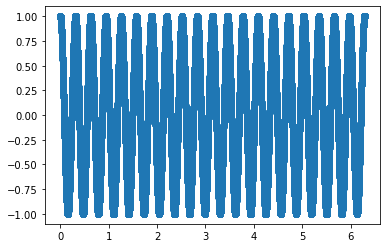

In [36]:
# M nonuniform points between 0-2pi
M = 100000
t = 2*pi*np.random.uniform(size=M)

f0 = 20
signal = 1*np.exp(1j*f0*t)

pl.plot(t, signal, 'o')

(-15.0, -25.0)

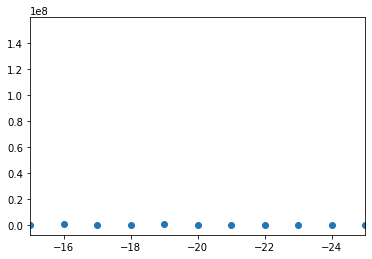

In [37]:
import nfft
bin_no = 10000
bins = np.arange(bin_no) - bin_no//2
test0 = nfft.nfft_adjoint(t, signal, bin_no)
pl.plot(bins, abs(test0)**2, 'o')
pl.xlim(-15, -25)

(-25.0, -15.0)

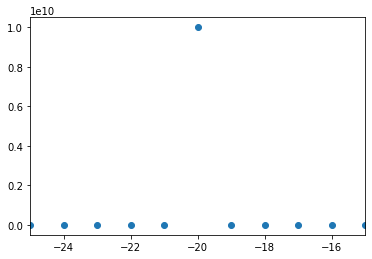

In [38]:
bin_no = 1000
bins = np.arange(bin_no) - bin_no//2

f = finufft.nufft1d1(t, signal.astype(complex), bin_no)
pl.plot(bins, abs(f)**2, 'o')
pl.xlim(-25, -15)

## Small $\dot{f}$

In [147]:
t = np.linspace(-pi, pi, int(1e5))
f0 = 20 # rad/s
fdot = 1e0 # rad/s^2 
phi = f0*t+fdot*t**2
tau = t*(1+fdot/f0*t)
# phi = np.mod(phi, 2*pi)
signal = 1*np.exp(1j*phi)

(-50.0, 0.0)

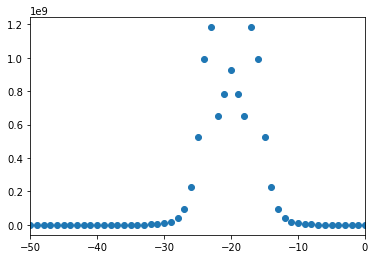

In [148]:
bin_no = 1000
bins = np.arange(bin_no) - bin_no//2

f = finufft.nufft1d1(t, signal.astype(complex), bin_no)
pl.plot(bins, abs(f)**2, 'o')
pl.xlim(-50, -0)

In [149]:
scale = (2*pi)/(tau[-1]-tau[0])
tau *= scale
start_diff = -pi-tau[0]
tau += start_diff

In [150]:
f0/scale

20.0

Maximum power at f = -20.00


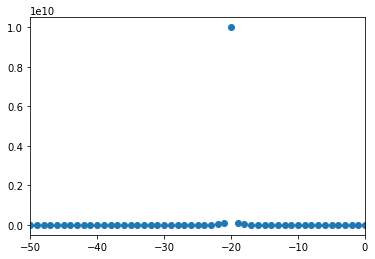

In [151]:
f = finufft.nufft1d1(tau, signal.astype(complex), bin_no)
pl.plot(bins, abs(f)**2, 'o')
pl.xlim(-50, -0)
found = bins[np.argmax(abs(f)**2)]
print('Maximum power at f = %.2f' % (found))

## beta

In [172]:
c = 3e8
G = 6.67e-11
pi = np.pi
const = 96/5*pi**(8/3)*(G/c**3)**(5/3)

f0 = 20
Mc = 3e-2* 2e30
f_max = 200
T_obs = 1e3
# pad_len = int(340*T_obs) #~0.01 added length to resampled data
beta = const*f0**(8/3)*Mc**(5/3)
f_signal = 5*f_max
nt = round(f_signal*T_obs)
t = (np.arange(nt)/f_signal).astype(np.longdouble)
f_ratio = 25

phi = -6*pi/5*f0*(1-8./3.*(beta)*t)**(5/8)/beta
phi = np.mod(phi,2*pi)
signal = 1*np.exp(1j*phi)

In [173]:
tau = -3/5*(1-8/3*beta*t)**(5/8)/beta
scale = (2*pi)/(tau[-1]-tau[0])
tau *= scale
start_diff = -pi-tau[0]
tau += start_diff

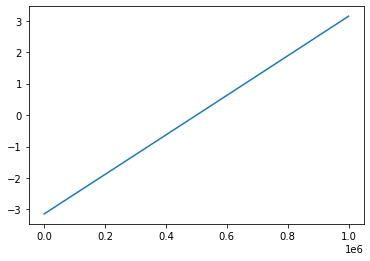

In [174]:
pl.plot(tau)

In [176]:
spectrum = np.fft.fftshift(np.fft.fft(signal))
freqs = np.fft.fftshift(np.fft.fftfreq(len(signal), d=t[1]-t[0]))

(19.0, 23.0)

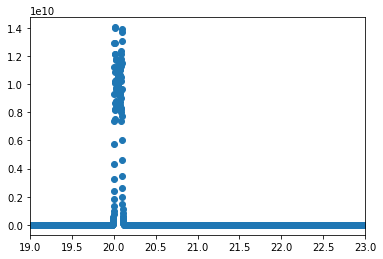

In [177]:
pl.plot(freqs, np.abs(spectrum)**2, 'o')
pl.xlim(19, 23)

In [180]:
f0/scale*2*pi

20050.016646572845504

In [183]:
len(signal)/2e4

50.0

Maximum power at f = -20050.00


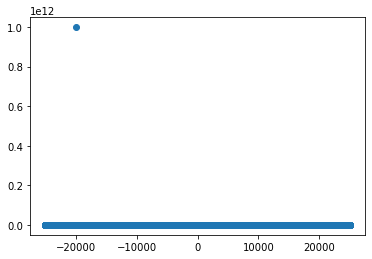

In [188]:
bin_no = int(len(signal)/20)
bins = np.arange(bin_no) - bin_no//2

f = finufft.nufft1d1(tau.astype(np.float64), signal.astype(complex), bin_no)
pl.plot(bins, abs(f)**2, 'o')
# pl.xlim(-20050 - 200, -20050 +200)
found = bins[np.argmax(abs(f)**2)]
print('Maximum power at f = %.2f' % (found))

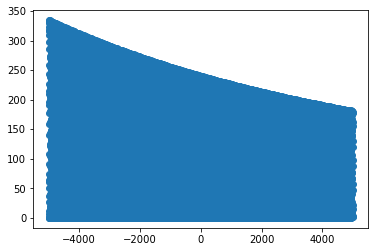

In [72]:
import nfft
bin_no = 10000
bins = np.arange(bin_no) - bin_no//2
test0 = nfft.nfft_adjoint(tau, signal, bin_no)
pl.plot(bins, abs(test0)**2, 'o')
# pl.xlim(-200, 0)

In [155]:
bin_no = len(freqs)
bins = np.arange(bin_no) - bin_no//2
f = finufft.nufft1d1(tau, signal, bin_no)

(-500000.0, 0.0)

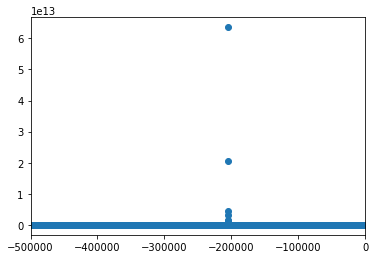

In [156]:
pl.plot(bins, abs(f)**2, 'o')
pl.xlim(-500000, 0)

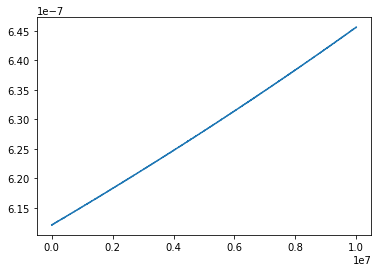

In [20]:
pl.plot(np.diff(tau))

## Testing

In [59]:
t = np.arange(1e4)/200
f0 = 20
fdot = 1e-2
phi = f0*t+fdot*t**2
# phi = np.mod(phi, 2*pi)
signal = 1*np.exp(1j*2*pi*phi)

In [60]:
tau = t*(1+fdot/f0*t)
tau -= tau[0]
tau *= (2*pi/tau[-1])

(-200.0, 0.0)

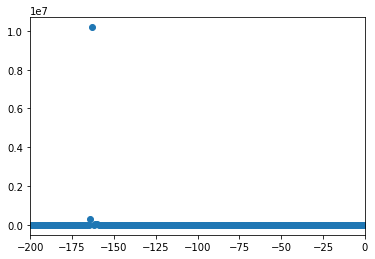

In [67]:
import nfft
bin_no = 10000
bins = np.arange(bin_no) - bin_no//2
test0 = nfft.nfft_adjoint(tau, signal, bin_no)
pl.plot(bins, abs(test0)**2, 'o')
pl.xlim(-200, 0)

In [135]:
bin_no = 500
bins = np.arange(bin_no) - bin_no//2
f = finufft.nufft1d1(tau, signal, bin_no, eps = 1e-8)

(0.0, 20.0)

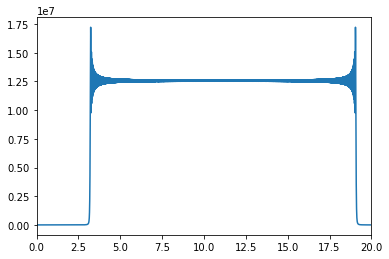

In [136]:
spectrum = np.fft.fftshift(np.fft.fft(signal))
freqs = np.fft.fftshift(np.fft.fftfreq(len(signal), d=t[1]-t[0]))
pl.plot(freqs, abs(spectrum)**2)
pl.xlim(0,20)

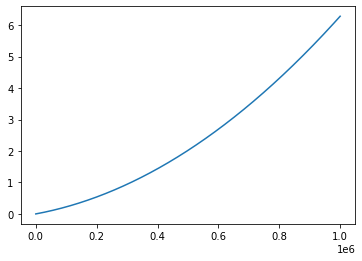

In [139]:
pl.plot(tau)

Maximum power at f = -0.31


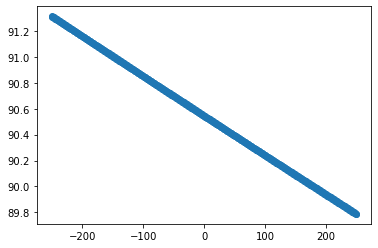

In [137]:
pl.plot(bins, abs(f)**2, 'o')
found = bins[np.argmax(abs(f)**2)]*(2*pi/t[-1])
print('Maximum power at f = %.2f' % (found))